In [52]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
n = 3000
sigma = 100
x = np.linspace(1,n,n)
y_star = np.concatenate([np.linspace(1, int(n/2), int(n/2)),
                         np.linspace(int(n/2), 1, int(n/2))])
y = y_star + sigma * np.random.randn(n)

In [64]:
D = (np.diag(2 * np.ones(n), 0) + np.diag(-1 * np.ones(n-1), 1)
     + np.diag(-1 * np.ones(n-1), -1))[1:n-1,:]

In [65]:
y_hat = cp.Variable(n)
objective = cp.norm(cp.matmul(D,y_hat),1)
constraints = [cp.norm(y - y_hat,2) <= sigma * np.sqrt(n)]
prob = cp.Problem(cp.Minimize(objective), constraints)

In [66]:
obj = prob.solve()

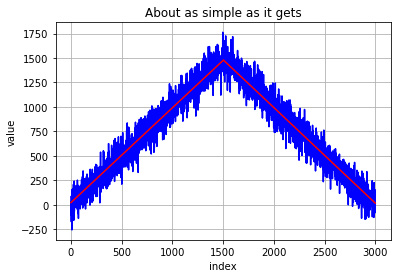

In [67]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b')

ax.plot(x, y_hat.value, 'r')

ax.set(xlabel='index', ylabel='value',
       title='About as simple as it gets')
ax.grid()

plt.show()